# IMDB

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.text import *

## Preparing the classifier

In [5]:
path = Path('/data/toxic/')
bs = 64
data_lm = TextLMDataBunch.load(path,'toxic_lm',bs=bs)


In [6]:
data_lm.show_batch()

idx,text
0,"xxmaj it is considered vandalism . xxmaj if you would like to experiment , use the sandbox . xxmaj thank you . - xxbos = = xxmaj on edit warring and xxup pov = = \n\n xxmaj someone pointed out this ' edit war ' on my talk page , and i 've been avoiding it . xxmaj but i took a look today and it seems pretty simple"
1,does nt really matter since copyright law does nt apply to xxmaj iran . xxup iri 's xxunk law does nt recognize international copyright law and international copy right law does nt protect xxmaj iranian materials . xxmaj the image is already all over the net so i do nt see why it should n't be on xxmaj wiki . xxbos * xxmaj hi . xxmaj it was just a
2,"to a tyrant ; nay to an immature little boy , despite your years ( oh and so many of them there are ) . xxmaj without hardly a glance you toss aside any changes you ca n't verify with the limitless tome you assume your mind to be . xxmaj and what of those whose revisions you 've mindlessly reverted , you dispatch to them on mass pseudo -"
3,""" "" ) . \n "" xxbos "" \n\n : : i have deleted the "" "" star - xxunk cast "" "" , as being superfluous : everybody can draw this conclusion on his own . xxmaj the "" "" splendid photography "" "" and "" "" unique , vibrant document "" "" are an almost xxunk consequence of this being a propaganda film , made by"
4,"will be more likely to associate the island with xxmaj europe rather than with xxmaj asia , so this was the reason for sorting the stub templates the way i did . xxmaj originally , we just used for all articles , but the material became so big that we broke it up by continent . i suspect that a stub template for xxmaj middle xxmaj east politicians will eventually"


Next time we launch this notebook, we can skip the cell above that took a bit of time (and that will take a lot more when you get to the full dataset) and load those results like this:

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [31]:
data_cls = TextDataBunch.from_csv(path,'train_labeled2.csv',text_cols=['comment_text'],label_cols=['label'],label_delim=' ',vocab=data_lm.vocab)


In [32]:
bs = 48

In [33]:
data_cls.show_batch()

text,target
xxbos xxmaj take that ! \n\n xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the,obscene;severe_toxic;toxic
xxbos xxup you xxup fucking xxup kike ! xxup don't xxup edit xxup things xxup you xxup have xxup no xxup idea xxup about ! xxup give xxup credit xxup where xxup it xxup 's xxup due ! xxup you xxup fucking xxup kike ! xxup don't xxup edit xxup things xxup you xxup have xxup no xxup idea xxup about ! xxup give xxup credit xxup where xxup it,insult;obscene;severe_toxic;toxic
"xxbos "" xxmaj the following entries have been removed from the xxmaj dungeons & xxmaj dragons in popular culture article . xxmaj the reason is that they are trivial or minor references , and may not have a reliable source available . xxmaj if you want to restore these to the main article , please discuss on the talk page first . \n\n xxmaj comics \n xxmaj xxunk",okay
"xxbos "" . xxmaj if you want to talk about linguistic issues in the xxmaj spanish xxmaj state , or about terrorist bands linked to nationalism , do so at their right articles . xxmaj the way you try to shove those topics in an article about "" "" xxmaj nationalities in xxmaj spain xxrep 4 "" looks like you´re trying to inject your personal , xxunk to those xxunk",okay
"xxbos "" \n\n novaseminary pov pushing , and section blanking . xxmaj so everyone is aware of his pov editing , i have copied some of his history here . i ask other editors not to restore his versions as they are pov and section blanking . \n xxmaj here is a little histoy on xxunk . xxmaj more can easily be found . i include it here to",okay


creat multiclass accuracy metric

In [38]:
acc_02 = partial(accuracy_thresh, thresh=0.2)

We can then create a model to classify those reviews and load the encoder we saved before.

In [39]:
learn = text_classifier_learner(data_cls, drop_mult=0.5, metrics=[acc_02])
learn.load_encoder('toxic_lm_finetuned_enc')
learn.freeze()

In [123]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


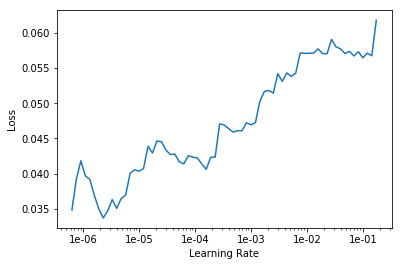

In [124]:
learn.recorder.plot()

In [42]:
1e-2

0.01

In [43]:
1e-1

0.1

In [48]:
5e-2

0.05

In [ ]:
.05

In [125]:
1e-6

1e-06

In [49]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh
1,0.099505,0.078640,0.960833


In [50]:
learn.save('toxic_cls_finetuned')

In [108]:
learn.load('toxic_cls_finetuned');

In [119]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(2e-2/(2.6**4),2e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh
1,0.070246,0.058520,0.971621
2,0.054977,0.060694,0.975430


In [120]:
learn.save('toxic_cls_finetuned2b')

In [122]:
learn.load('toxic_cls_finetuned2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList
y: MultiCategoryList (127656 items)
[MultiCategory okay, MultiCategory okay, MultiCategory okay, MultiCategory okay, MultiCategory okay]...
Path: /data/toxic
x: TextList (127656 items)
[Text xxbos xxmaj really ? xxmaj ya do n't say ? xxmaj who 'd a xxunk ?, Text xxbos " 

  xxmaj reverting xxmaj vandalism 

 xxmaj is there a hot key or something that i can use to easily describe what i am doing in the " " xxmaj edit xxmaj summary " " when i revert vandalism or do i need to physically type the information every time ? ", Text xxbos " 
 xxmaj improvement 
 xxmaj please look at the last addition that improves the discussion about oxyhydrogen and the " " bad word " " xxup xxunk . xxmaj steve , you always say that we need sources . i have placed several peer reviewed sources and someone just cancelled . i made a mistake of not having this note written before , but , i had no time yesterday . xxmaj apologies xxrep 4 . i am adding it now an

ran out of mem again, reload model and run.

whats really going on here is that when I unfreeze more layers I'm giving the gpu a ton more params to compute on each pass.. this means I have to reduce the batch size from what was working for finetuning the first layer to finetuning 3 layers.

found this section of the forum talking about it:

```data = ImageClassifierData_from_paths(PATH, bs=new_bs, tfms=tfms_from_model(arch,sz))
learn.precompute = False
learn.set_data(data)```

In [1]:
bs=48
path = Path('/data/toxic/')
data_lm = TextLMDataBunch.load(path,'toxic_lm',bs=bs)
data_cls = TextDataBunch.from_csv(path,'train_labeled2.csv',text_cols=['comment_text'],label_cols=['label'],label_delim=' ',vocab=data_lm.vocab)

acc_02 = partial(accuracy_thresh, thresh=0.2)

learn = text_classifier_learner(data_cls, drop_mult=0.7, metrics=[acc_02])
learn.load_encoder('toxic_lm_finetuned_enc')
learn.load('toxic_cls_finetuned2');

NameError: name 'Path' is not defined

In [4]:
sum(p.numel() for p in learn.model.parameters() if p.requires_grad)

62907

In [ ]:
learn.freeze_to(-2)

In [6]:
sum(p.numel() for p in learn.model.parameters() if p.requires_grad)

2546107

In [ ]:
learn.fit_one_cycle(3, slice(1e-6/(2.6**4),3e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh


In [127]:
learn.fit_one_cycle(3, slice(3e-3/(2.6**4),3e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh
1,0.062232,0.074586,0.974240
2,0.068340,0.047503,0.976666
3,0.058352,0.053249,0.974643


In [133]:
learn.save('toxic_cls_finetuned2c')

In [6]:
learn.model[0]

MultiBatchRNNCore(
  (encoder): Embedding(60003, 400, padding_idx=1)
  (encoder_dp): EmbeddingDropout(
    (emb): Embedding(60003, 400, padding_idx=1)
  )
  (rnns): ModuleList(
    (0): WeightDropout(
      (module): LSTM(400, 1150, batch_first=True)
    )
    (1): WeightDropout(
      (module): LSTM(1150, 1150, batch_first=True)
    )
    (2): WeightDropout(
      (module): LSTM(1150, 400, batch_first=True)
    )
  )
  (input_dp): RNNDropout()
  (hidden_dps): ModuleList(
    (0): RNNDropout()
    (1): RNNDropout()
    (2): RNNDropout()
  )
)

find how many params are actually trainable in a given model based on which ones aren't frozen. this wil help in the future when trying to figure out how many can be put onto the gpu

In [11]:
sum(p.numel() for p in learn.model.parameters() if p.requires_grad)

19065307

In [4]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh


RuntimeError: CUDA out of memory. Tried to allocate 66.62 MiB (GPU 0; 5.93 GiB total capacity; 4.80 GiB already allocated; 67.38 MiB free; 250.42 MiB cached)

In [ ]:
learn.save('toxic_cls_finetuned3')

Just for kicks, try it out on some existing samples of data, and make up some

In [9]:
learn.predict("GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP.  I'M FUCKED UP RIGHT NOW!")

(MultiCategory insult;obscene;severe_toxic;toxic,
 tensor([0., 1., 1., 0., 1., 0., 1.]),
 tensor([0.0056, 0.6599, 0.9731, 0.0022, 0.5382, 0.0337, 0.9966]))

In [10]:
learn.predict("You are the shittiest editor I've ever met in my life. Use your dumbass little fingers to go pick your butt.")

(MultiCategory insult;obscene;toxic,
 tensor([0., 1., 1., 0., 0., 0., 1.]),
 tensor([0.0073, 0.7812, 0.7074, 0.0093, 0.0613, 0.0104, 0.9850]))

In [11]:
learn.predict("Thanks for taking the effort to help out ont his the other day, you caught a few errors I missed :)")

(MultiCategory okay,
 tensor([0., 0., 0., 1., 0., 0., 0.]),
 tensor([2.9943e-05, 1.6462e-04, 1.1089e-04, 9.9961e-01, 2.5609e-05, 8.7224e-05,
         3.5441e-04]))

In [37]:
learn.predict("I'm gunna come kill your sorry ass")

(MultiCategory obscene;threat;toxic,
 tensor([0., 0., 1., 0., 0., 1., 1.]),
 tensor([0.0194, 0.4015, 0.7755, 0.0053, 0.2811, 0.9550, 0.9923]))

try and predict the values of test and score it

In [19]:
np.array(learn.predict("Thanks for taking the effort to help out ont his the other day, you caught a few errors I missed :)")[2])

array([2.994265e-05, 1.646208e-04, 1.108864e-04, 9.996081e-01, 2.560941e-05, 8.722375e-05, 3.544122e-04], dtype=float32)

In [113]:
def model_pred(row,learn):
    pred = np.array(learn.predict(row['comment_text'])[2])
    # ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    # return pred[6],pred[4],pred[2],pred[5],pred[1],pred[0] # pred[3] is okay
    return pred

model_pred_set = partial(model_pred,learn=learn)

In [12]:
test_df = pd.read_csv(path/'test.csv')

In [14]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [134]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [135]:
model_label_map = {'identity_hate':0, 'insult':1, 'obscene':2, 'severe_toxic':4, 'threat':5, 'toxic':6}

In [ ]:
%%time
test_df['pred'] = test_df.apply(model_pred_set,axis=1)

In [ ]:
for label in labels:
    test_df[label] = test_df['pred'].apply(lambda x: x[model_label_map[label]])

In [ ]:
test_df[['id','toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].to_csv('/data/toxic/ft2c.csv',index=False)

In [106]:
test_df.head()

,id,comment_text,pred,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,"[0.6199746, 0.8803529, 0.9456099, 0.004148753,...",0.992484,0.287364,0.945610,0.069803,0.880353,0.619975
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,"[4.984817e-05, 0.00025699934, 0.00024182763, 0...",0.000699,0.000093,0.000242,0.000057,0.000257,0.000050
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...","[6.592622e-05, 0.00019218664, 0.0002554554, 0....",0.000522,0.000076,0.000255,0.000038,0.000192,0.000066
3,00017563c3f7919a,":If you have a look back at the source, the in...","[2.172245e-05, 8.874213e-05, 8.6309476e-05, 0....",0.000119,0.000022,0.000086,0.000060,0.000089,0.000022
4,00017695ad8997eb,I don't anonymously edit articles at all.,"[0.0004767867, 0.0020870555, 0.0019417837, 0.9...",0.009781,0.000581,0.001942,0.000554,0.002087,0.000477


In [101]:
test_df.loc[0,'comment_text']

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [100]:
a

,index,comment_text,"(a, b, c, d, e, f)",i,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,"[0.99248356, 0.28736445, 0.9456099, 0.06980274...","[0.99248356, 0.28736445, 0.9456099, 0.06980274...","[0.6199746, 0.8803529, 0.9456099, 0.004148753,...",0.992484,0.287364,0.945610,0.069803,0.880353,0.619975
1,1,"[0.0006987686, 9.297005e-05, 0.00024182763, 5....","[0.0006987686, 9.297005e-05, 0.00024182763, 5....","[4.984817e-05, 0.00025699934, 0.00024182763, 0...",0.000699,0.000093,0.000242,0.000057,0.000257,0.000050
2,2,"[0.0005222669, 7.638931e-05, 0.0002554554, 3.7...","[0.0005222669, 7.638931e-05, 0.0002554554, 3.7...","[6.592622e-05, 0.00019218664, 0.0002554554, 0....",0.000522,0.000076,0.000255,0.000038,0.000192,0.000066
3,3,"[0.0001187438, 2.240059e-05, 8.6309476e-05, 5....","[0.0001187438, 2.240059e-05, 8.6309476e-05, 5....","[2.172245e-05, 8.874213e-05, 8.6309476e-05, 0....",0.000119,0.000022,0.000086,0.000060,0.000089,0.000022
4,4,"[0.009780869, 0.0005805743, 0.0019417837, 0.00...","[0.009780869, 0.0005805743, 0.0019417837, 0.00...","[0.0004767867, 0.0020870555, 0.0019417837, 0.9...",0.009781,0.000581,0.001942,0.000554,0.002087,0.000477


In [44]:
a['comment_text'].expand()

AttributeError: 'Series' object has no attribute 'expand'

and unfreeze and train the rest

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.240424,0.155204,0.943160
2,0.217462,0.153421,0.943960


In [ ]:
learn.save('toxic_cls_fulltuned3')